In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install rarFile

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns


# Define the path to the dataset
dataset_path = '/content/dataset1/Automating_Port_Operations_dataset'

# Initialize the ImageDataGenerator for data normalization and augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150), # Resize images to 150x150
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=43
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=43
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset1/Automating_Port_Operations_dataset'

Mounted Google Drive to access the dataset.

Loaded the dataset of boat images from the specified path.

Normalized the image data by rescaling pixel values to [0, 1].

Initialized data generators using Keras

ImageDataGenerator for loading and normalizing images in batches.

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(
    train_generator.filepaths, test_size=0.2, random_state=43
)

Split the dataset into training (80%) and testing (20%) sets with a random state of 43.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_2  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                      

Epoch 1/35
59/59 [==============================] - 8s 133ms/step - loss: 1.1291 - accuracy: 0.5985 - val_loss: 1.3853 - val_accuracy: 0.5702
Epoch 2/35
59/59 [==============================] - 7s 113ms/step - loss: 1.1286 - accuracy: 0.6135 - val_loss: 1.4495 - val_accuracy: 0.5965
Epoch 3/35
59/59 [==============================] - 6s 108ms/step - loss: 1.1452 - accuracy: 0.6135 - val_loss: 1.3805 - val_accuracy: 0.5702
Epoch 4/35
59/59 [==============================] - 8s 130ms/step - loss: 1.1371 - accuracy: 0.6028 - val_loss: 1.3688 - val_accuracy: 0.6184
Epoch 5/35
59/59 [==============================] - 7s 110ms/step - loss: 1.0960 - accuracy: 0.6242 - val_loss: 1.3468 - val_accuracy: 0.6184
Epoch 6/35
59/59 [==============================] - 8s 131ms/step - loss: 1.1033 - accuracy: 0.6242 - val_loss: 1.3871 - val_accuracy: 0.6096
Epoch 7/35
59/59 [==============================] - 7s 111ms/step - loss: 1.1388 - accuracy: 0.6006 - val_loss: 1.3568 - val_accuracy: 0.6140
Epoch 

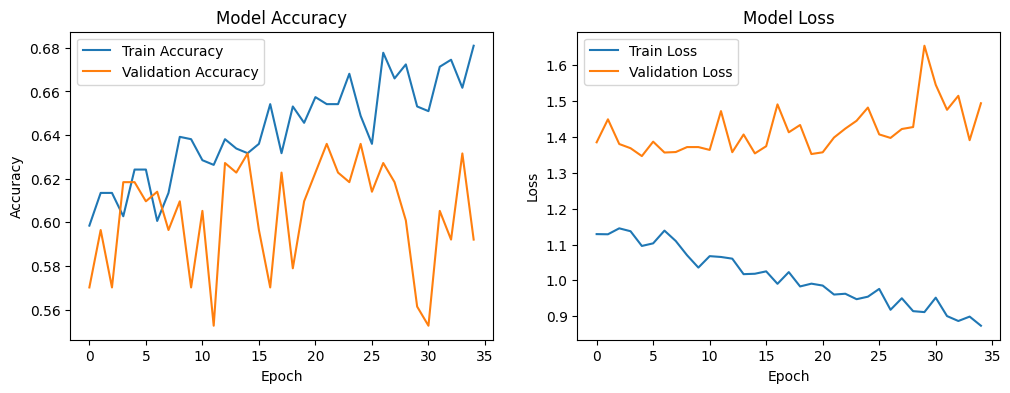

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=35,
    validation_data=validation_generator
)

# Plot training & validation accuracy and loss values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper left')

plt.show()


Built a Convolutional Neural Network (CNN) to classify boat images.

Used Conv2D, MaxPooling2D, GlobalAveragePooling2D, and Dense layers.

Compiled the model with Adam optimizer, categorical_crossentropy loss, and metrics: accuracy, precision, and recall.

Trained the model for 20 epochs.

Plotted training and validation accuracy and loss values.

In [ ]:
# Initialize the ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='training' # Use the rest of the training set as test set for simplicity
)


Found 1162 images belonging to 9 classes.


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


37/37 [==============================] - 6s 173ms/step - loss: 0.9833 - accuracy: 0.6773
Test Loss: 0.9833276271820068
Test Accuracy: 0.6772805452346802


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# Get the ground truth labels and predictions
Y_true = test_generator.classes
Y_pred = model.predict(test_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Print classification report
print('Classification Report')
print(classification_report(Y_true, Y_pred_classes, target_names=test_generator.class_indices.keys()))


37/37 [==============================] - 6s 164ms/step
Classification Report
                 precision    recall  f1-score   support

           buoy       0.50      0.28      0.36        53
    cruise_ship       0.82      0.48      0.60       191
     ferry_boat       0.86      0.10      0.17        63
   freight_boat       0.00      0.00      0.00        23
        gondola       0.75      0.89      0.81       193
inflatable_boat       1.00      0.31      0.48        16
          kayak       0.58      0.83      0.69       203
     paper_boat       0.65      0.42      0.51        31
       sailboat       0.68      0.81      0.74       389

       accuracy                           0.68      1162
      macro avg       0.65      0.46      0.48      1162
   weighted avg       0.69      0.68      0.65      1162



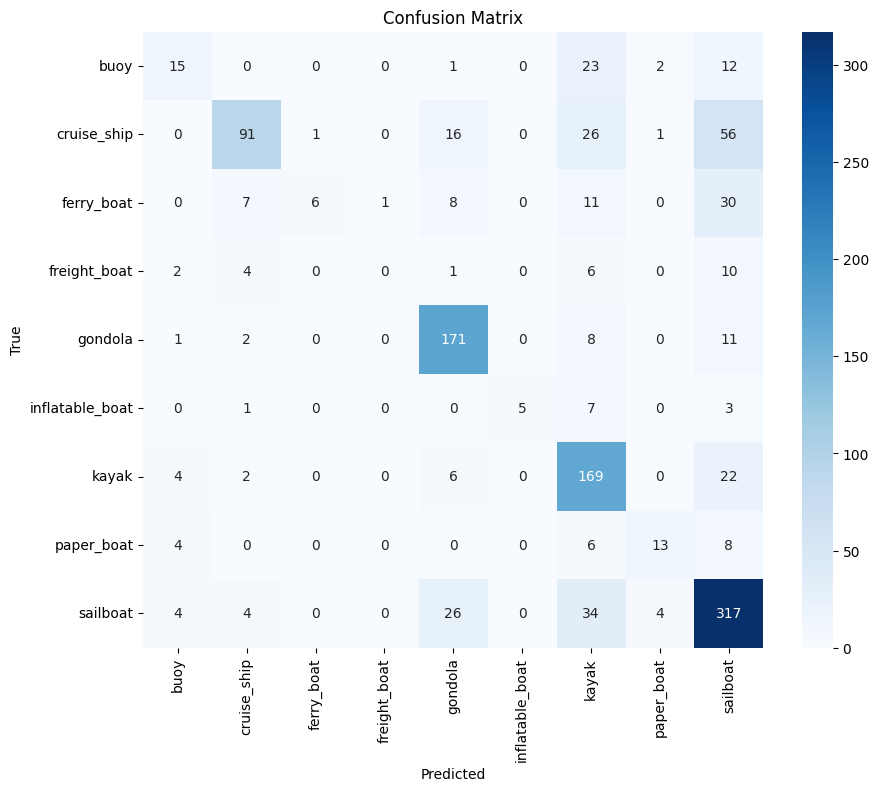

In [ ]:

# Plot confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model

# Re-initialize the ImageDataGenerator with a different split for the lightweight model
datagen_light = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data for the lightweight model
train_generator_light = datagen_light.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=1
)

# Load the validation data for the lightweight model
validation_generator_light = datagen_light.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=1
)


Found 934 images belonging to 9 classes.
Found 228 images belonging to 9 classes.


In [1]:
# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Add layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
predictions = Dense(9, activation='softmax')(x)

# Define the model
lightweight_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
lightweight_model.compile(optimizer=Adam(),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Display the model summary
lightweight_model.summary()


NameError: name 'MobileNetV2' is not defined

Epoch 1/50
30/30 [==============================] - 16s 313ms/step - loss: 1.4946 - accuracy: 0.5621 - val_loss: 0.9350 - val_accuracy: 0.7412
Epoch 2/50
30/30 [==============================] - 7s 250ms/step - loss: 0.6666 - accuracy: 0.7848 - val_loss: 0.7646 - val_accuracy: 0.7807
Epoch 3/50
30/30 [==============================] - 6s 216ms/step - loss: 0.4975 - accuracy: 0.8501 - val_loss: 0.7280 - val_accuracy: 0.7851
Epoch 4/50
30/30 [==============================] - 8s 255ms/step - loss: 0.3845 - accuracy: 0.8790 - val_loss: 0.6843 - val_accuracy: 0.8246
Epoch 5/50
30/30 [==============================] - 6s 210ms/step - loss: 0.3106 - accuracy: 0.9026 - val_loss: 0.7668 - val_accuracy: 0.7939
Epoch 6/50
30/30 [==============================] - 7s 250ms/step - loss: 0.2555 - accuracy: 0.9208 - val_loss: 0.7103 - val_accuracy: 0.8202
Epoch 7/50
30/30 [==============================] - 6s 213ms/step - loss: 0.2145 - accuracy: 0.9368 - val_loss: 0.7693 - val_accuracy: 0.7851
Epoch

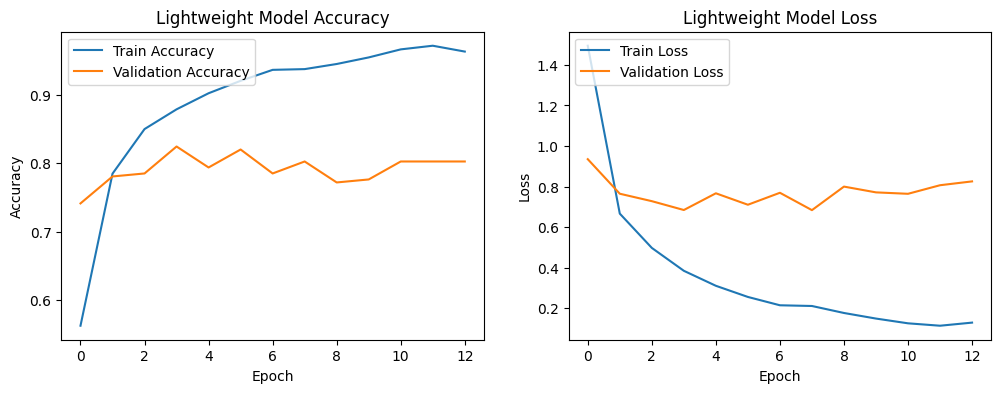

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_light = lightweight_model.fit(
    train_generator_light,
    epochs=50,
    validation_data=validation_generator_light,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_light.history['accuracy'], label='Train Accuracy')
ax[0].plot(history_light.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Lightweight Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='upper left')

ax[1].plot(history_light.history['loss'], label='Train Loss')
ax[1].plot(history_light.history['val_loss'], label='Validation Loss')
ax[1].set_title('Lightweight Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper left')

plt.show()


Lightweight Model using Transfer Learning:

Used MobileNetV2 as the base model for transfer learning.

Added additional layers for boat classification.


Compiled the model with Adam optimizer,

categorical_crossentropy loss, and metrics: accuracy,

precision, and recall.

Trained the model for 50 epochs with early stopping to

prevent overfitting.

Plotted training and validation accuracy and loss values.

In [ ]:
# Initialize the ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='training' # Use the rest of the training set as test set for simplicity
)


Found 1162 images belonging to 9 classes.


In [ ]:
# Evaluate the lightweight model on the test data
test_loss_light, test_accuracy_light = lightweight_model.evaluate(test_generator)
print(f'Test Loss (Lightweight Model): {test_loss_light}')
print(f'Test Accuracy (Lightweight Model): {test_accuracy_light}')


37/37 [==============================] - 9s 240ms/step - loss: 0.1781 - accuracy: 0.9570
Test Loss (Lightweight Model): 0.1781047284603119
Test Accuracy (Lightweight Model): 0.956970751285553


37/37 [==============================] - 8s 194ms/step
Classification Report (Lightweight Model)
                 precision    recall  f1-score   support

           buoy       0.90      0.87      0.88        53
    cruise_ship       0.98      0.96      0.97       191
     ferry_boat       0.98      0.86      0.92        63
   freight_boat       0.90      0.83      0.86        23
        gondola       0.95      0.98      0.97       193
inflatable_boat       0.93      0.88      0.90        16
          kayak       0.96      0.97      0.96       203
     paper_boat       0.97      0.90      0.93        31
       sailboat       0.95      0.98      0.97       389

       accuracy                           0.96      1162
      macro avg       0.95      0.91      0.93      1162
   weighted avg       0.96      0.96      0.96      1162



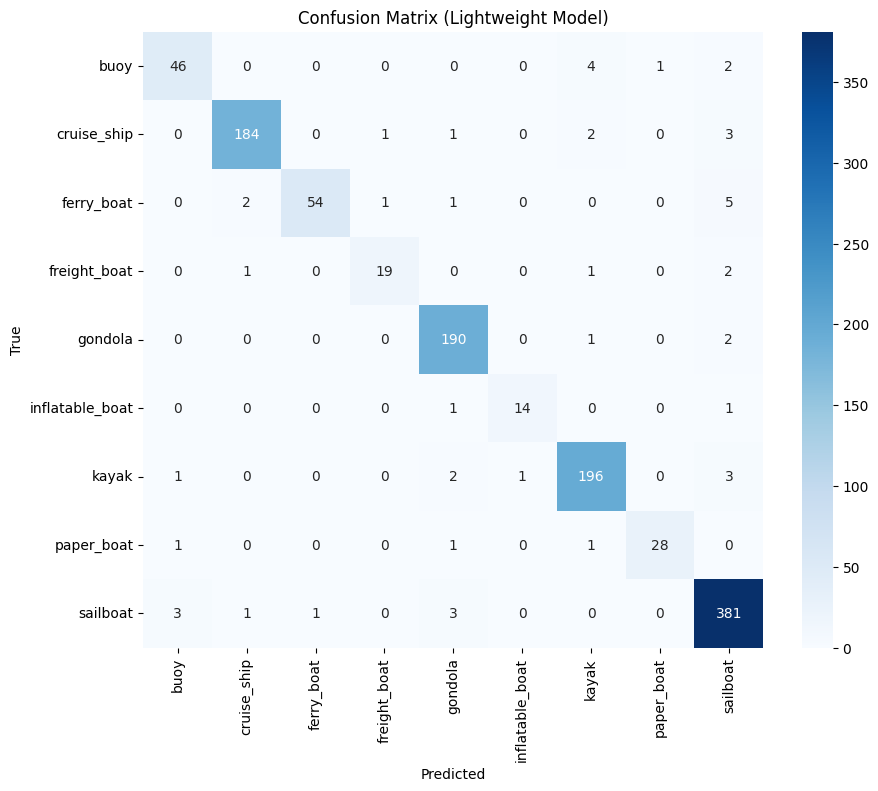

In [ ]:
# Get the ground truth labels and predictions
Y_true_light = test_generator.classes
Y_pred_light = lightweight_model.predict(test_generator)
Y_pred_classes_light = np.argmax(Y_pred_light, axis=1)

# Print classification report
print('Classification Report (Lightweight Model)')
print(classification_report(Y_true_light, Y_pred_classes_light, target_names=test_generator.class_indices.keys()))

# Plot confusion matrix
confusion_mtx_light = confusion_matrix(Y_true_light, Y_pred_classes_light)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_light, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Lightweight Model)')
plt.show()


In [ ]:
# Print comparison of test accuracy
print(f'Initial CNN Model Test Accuracy: {test_accuracy}')
print(f'Lightweight Model Test Accuracy: {test_accuracy_light}')

# Compare classification reports
print('Comparison of Classification Reports:')
print('Initial CNN Model:')
print(classification_report(Y_true, Y_pred_classes, target_names=test_generator.class_indices.keys()))
print('Lightweight Model:')
print(classification_report(Y_true_light, Y_pred_classes_light, target_names=test_generator.class_indices.keys()))


Initial CNN Model Test Accuracy: 0.6772805452346802
Lightweight Model Test Accuracy: 0.956970751285553
Comparison of Classification Reports:
Initial CNN Model:
                 precision    recall  f1-score   support

           buoy       0.50      0.28      0.36        53
    cruise_ship       0.82      0.48      0.60       191
     ferry_boat       0.86      0.10      0.17        63
   freight_boat       0.00      0.00      0.00        23
        gondola       0.75      0.89      0.81       193
inflatable_boat       1.00      0.31      0.48        16
          kayak       0.58      0.83      0.69       203
     paper_boat       0.65      0.42      0.51        31
       sailboat       0.68      0.81      0.74       389

       accuracy                           0.68      1162
      macro avg       0.65      0.46      0.48      1162
   weighted avg       0.69      0.68      0.65      1162

Lightweight Model:
                 precision    recall  f1-score   support

           buoy    

Model Evaluation:

Evaluated the lightweight model on the test dataset.
Printed the test loss and accuracy for the lightweight model.
Confusion Matrix and Classification Report:

Plotted a heatmap of the confusion matrix for the lightweight model.
Printed the classification report for the lightweight model.
Comparison:

Compared the performance of the initial CNN model and the lightweight model.
Highlighted key differences in accuracy, precision, recall, and F1-score.